In [18]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Loading the dataset
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


-> So there are total of 70,000 images with 28x28x1 dimensions.

Label of the image: 5


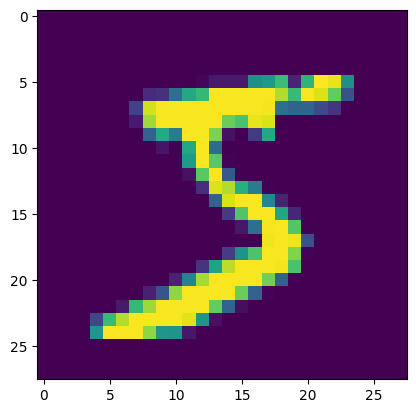

In [3]:
plt.imshow(X_train[0])
print(f"Label of the image: {Y_train[0]}")

-> But we are using LeNet-5 architectue which expects input of 32x32x1. So, we have to pad the images.

In [4]:
# Expanding dimensions to add channels (28x28 to 28x28x1)
X_train = tf.expand_dims(X_train, axis=-1)
X_test = tf.expand_dims(X_test, axis=-1)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


In [5]:
# Padding the images (28x28x1 to 32x32x1)
X_train = tf.pad(X_train, paddings=[[0,0], [2,2], [2,2], [0,0]])
X_test = tf.pad(X_test, paddings=[[0, 0],   # batch dimension → no padding
                                  [2, 2],   # height dimension → pad 2 pixels on top and 2 on bottom
                                  [2, 2],   # width dimension → pad 2 pixels on left and 2 on right
                                  [0, 0]])    # channel dimension → no padding

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 32, 32, 1) (60000,)
(10000, 32, 32, 1) (10000,)


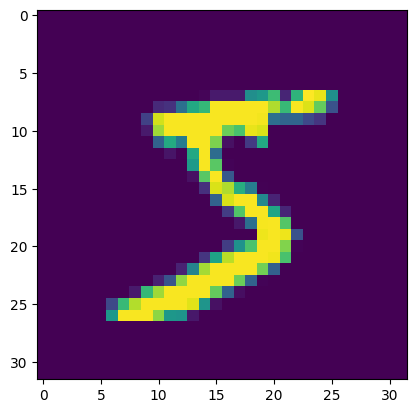

In [6]:
plt.imshow(X_train[0])

## <b>Using the LeNet-5 Architecture</b>

In [7]:
# Creating LeNet-5 model architecture
lenet_5 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 1)),                          # Input layer (grayscale, 32x32)

    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='tanh', name='conv_layer_1'),  # C1: Conv (5x5), 6 filters
    tf.keras.layers.AveragePooling2D(pool_size=2, strides=2, name='avgpooling_1'),             # S1: Avg Pooling (2x2)

    tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='tanh', name='conv_layer_2'), # C2: Conv (5x5), 16 filters
    tf.keras.layers.AveragePooling2D(pool_size=2, strides=2, name='avgpooling_2'),             # S2: Avg Pooling (2x2)

    tf.keras.layers.Flatten(),                                            # Flatten for FC layers

    tf.keras.layers.Dense(120, activation='tanh', name='FC_3'),                        # F3: Fully connected
    tf.keras.layers.Dense(84, activation='tanh', name='FC_4'),                         # F4: Fully connected
    tf.keras.layers.Dense(10, activation='softmax', name='FC_5')                       # F5: Output layer
])

In [8]:
lenet_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_layer_1 (Conv2D)           │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ avgpooling_1 (AveragePooling2D) │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_2 (Conv2D)           │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ avgpooling_2 (AveragePooling2D) │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC_3 (Dense)                    │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC_4 (Dense)                    │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC_5 (Dense)                    │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
lenet_5.compile(loss='sparse_categorical_crossentropy',  # Original LeNet-5 used MSE
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                metrics=['accuracy'])

In [10]:
history = lenet_5.fit(X_train, Y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8017 - loss: 0.7851 - val_accuracy: 0.9516 - val_loss: 0.1782
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9537 - loss: 0.1693 - val_accuracy: 0.9690 - val_loss: 0.1180
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9661 - loss: 0.1206 - val_accuracy: 0.9732 - val_loss: 0.0966
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9714 - loss: 0.1005 - val_accuracy: 0.9756 - val_loss: 0.0880
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9751 - loss: 0.0851 - val_accuracy: 0.9792 - val_loss: 0.0784
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9778 - loss: 0.0773 - val_accuracy: 0.9786 - val_loss: 0.0720
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9803 - loss: 0.0699 - val_accuracy: 0.9786 - val_loss: 0.0731
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9812 - loss: 0.0633 - 

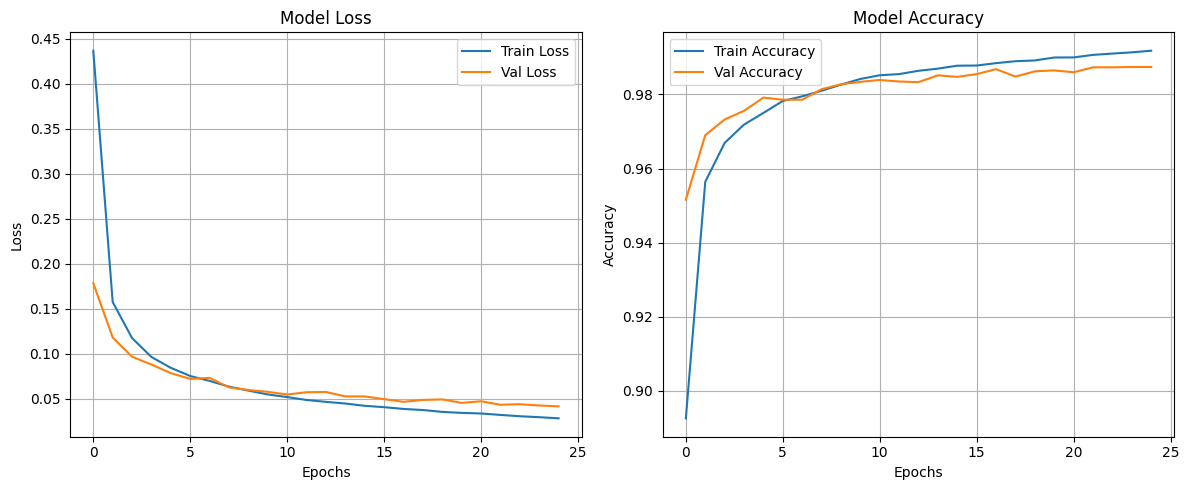

In [ ]:
# Plotting the loss and accuracy
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(history.history['loss'], label='Train Loss')
axs[0].plot(history.history['val_loss'], label='Val Loss')
axs[0].set_title('Model Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(history.history['accuracy'], label='Train Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Val Accuracy')
axs[1].set_title('Model Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [28]:
# Making a prediction
image = tf.expand_dims(X_test[179], axis=0)
print(image.shape)

(1, 32, 32, 1)


In [29]:
prediction = lenet_5.predict(image)
print(f'Softmax Probabilities: {prediction}')
print(f'Predicted Digit: {np.argmax(prediction)}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Softmax Probabilities: [[5.8548943e-07 1.3388924e-05 9.8011550e-04 9.2705821e-05 8.5302396e-08
  8.0070049e-07 4.3970061e-07 1.5178188e-06 9.9890578e-01 4.4619642e-06]]
Predicted Digit: 8


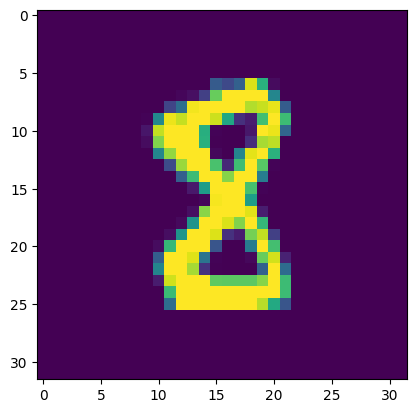

In [30]:
# Showing the image
plt.imshow(X_test[179])

<hr>